In [2]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

['/mnt/data0/ildefog/Projects/NERM/model_analysis/Modes_protein_dynamics', '/home/jupyterhub/miniconda3/lib/python37.zip', '/home/jupyterhub/miniconda3/lib/python3.7', '/home/jupyterhub/miniconda3/lib/python3.7/lib-dynload', '', '/home/ildefog/.local/lib/python3.7/site-packages', '/home/ildefog/.local/lib/python3.7/site-packages/pydyno-0.1.1+94.g9b93be5-py3.7-linux-x86_64.egg', '/home/ildefog/.local/lib/python3.7/site-packages/sympy-1.5-py3.7.egg', '/home/ildefog/.local/lib/python3.7/site-packages/pysb-1.11.0-py3.7.egg', '/home/jupyterhub/miniconda3/lib/python3.7/site-packages', '/home/jupyterhub/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/home/ildefog/.ipython', '../../', '/home/ildefog/main/Projects/NERM/', '../../', '/home/ildefog/main/Projects/NERM/']


In [116]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster4_5720_mod.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [182]:
mode1_100[0]

array([2.32600000e+03, 4.80000000e+03, 4.69600000e+03, 4.00000000e+04,
       1.17760000e+04, 9.00000000e+03, 9.00000000e+03, 9.00000000e+03,
       3.10900000e+03, 3.90000000e+03, 7.22600000e+03, 3.79900000e+03,
       1.06540000e+04, 5.54400000e+03, 1.97196861e-07, 5.93424172e-04,
       9.92078139e-05, 5.55291587e-07, 1.42416162e-01, 5.00784672e+03,
       1.76585766e-03, 3.97906353e+00, 3.72676067e-06, 4.15493587e+00,
       7.43151158e-03, 2.55181451e-03, 1.63679889e-03, 6.79286289e-09,
       4.62644290e+02, 3.86356627e-06, 2.18682817e+01, 4.62644290e+02,
       3.89726331e-02, 1.13651777e-04, 2.81208603e+06, 3.52896159e-02,
       3.85863441e-02, 9.19786699e-01, 4.05202911e-04, 3.59014771e-07,
       3.92308993e-04, 4.91447197e-01, 4.35180593e+01, 9.54944079e-04,
       2.39209291e-01, 5.28318555e-03, 3.50692934e+01, 1.14472403e-01,
       1.54165300e-02, 1.14162116e-04, 5.93716929e-04, 2.16973042e+00,
       9.34925296e+01, 1.41543684e+02])

In [3]:
clus0_100e = np.load('../../param_files/necro_pars10k_cluster01_5720_modsplit.npy')
clus0_100m = np.load('../../param_files/necro_pars10k_cluster02_5720_modsplit.npy')
clus0_100d = np.load('../../param_files/necro_pars10k_cluster03_5720_modsplit.npy')

In [154]:
tspan = np.linspace(0, 1800, 500)

In [181]:
list(model.initial_conditions)

[(TNF(brec=None), Parameter('TNF_0', 2326.0)),
 (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)),
 (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None),
  Parameter('TRADD_0', 4696.0)),
 (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'),
  Parameter('RIP1_0', 40000.0)),
 (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'),
  Parameter('TRAF_0', 11776.0)),
 (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)),
 (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)),
 (A20(brip=None), Parameter('A20_0', 9000.0)),
 (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)),
 (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)),
 (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)),
 (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)),
 (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)),
 (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 379

In [155]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(param_values=mode1_100, num_processors = 20)
m1alldf100wt = wtm1.dataframe

2022-01-07 10:49:03.392 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 10:49:03.405 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 10:49:03.476 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 10:49:03.714 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 10:53:32.032 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 10:53:32.035 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 10:53:34.061 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [183]:
solverwtm1kd = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1kd = solverwtm1kd.run(initials = {m.MLKL(bRHIM=None, state='unmod'):4989},
                          param_values=mode1_100, num_processors = 20)
m1alldf100wtkd = wtm1kd.dataframe

2022-01-09 16:54:33.628 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-09 16:54:33.641 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-09 16:54:33.712 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-09 16:54:33.925 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-09 16:58:49.957 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-09 16:58:49.961 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-09 16:58:52.017 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [184]:
solverwtm1kd2 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1kd2 = solverwtm1kd2.run(initials = {m.MLKL(bRHIM=None, state='unmod'):554},
                          param_values=mode1_100, num_processors = 20)
m1alldf100wtkd2 = wtm1kd2.dataframe

2022-01-09 16:58:54.912 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-09 16:58:54.918 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-09 16:58:54.951 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-09 16:58:55.140 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-09 17:03:09.893 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-09 17:03:09.896 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-09 17:03:11.940 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


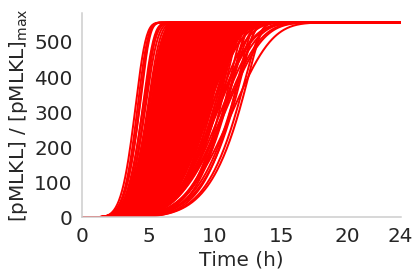

In [199]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wtkd2.loc[n]['MLKLa_obs'].iloc[:],
             color = 'red', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.set_yticks([0, 0.5, 1.0])
# plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogridwdata.pdf')
plt.show() 

In [200]:
print(m1alldf100wtkd.loc[n]['MLKLa_obs'].iloc[:].max()) #4989
print(m1alldf100wtkd2.loc[n]['MLKLa_obs'].iloc[:].max()) #554
print(m1alldf100wtoe.loc[n]['MLKLa_obs'].iloc[:].max()) #6098
print(m1alldf100wtoe2.loc[n]['MLKLa_obs'].iloc[:].max()) #54440

4989.00000000001
554.0000000000142
6098.00000000002
55439.99999999991


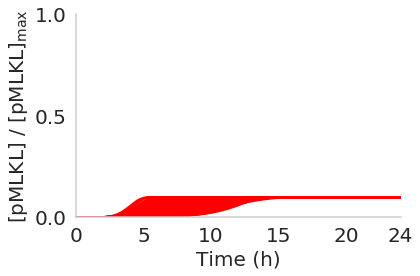

In [197]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wtkd2.loc[n]['MLKLa_obs'].iloc[:]/5544,
             color = 'red', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
# plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogridwdata.pdf')
plt.show() 

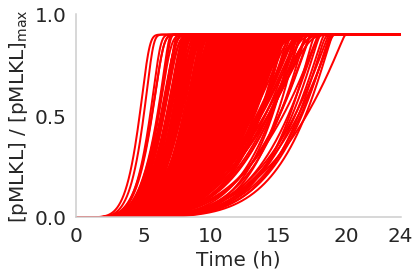

In [201]:
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wtkd.loc[n]['MLKLa_obs'].iloc[:],
             color = 'red', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
# plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogridwdata.pdf')
plt.show() 

In [185]:
solverwtm1oe = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1oe = solverwtm1.run(initials = {m.MLKL(bRHIM=None, state='unmod'):6098},
                        param_values=mode1_100, num_processors = 20)
m1alldf100wtoe = wtm1oe.dataframe

2022-01-09 17:03:15.122 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-09 17:03:15.127 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-09 17:03:15.161 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-09 17:03:15.353 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-09 17:07:28.791 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-09 17:07:28.794 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-09 17:07:31.157 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [186]:
solverwtm1oe2 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1oe2 = solverwtm1oe2.run(initials = {m.MLKL(bRHIM=None, state='unmod'):55440},
                        param_values=mode1_100, num_processors = 20)
m1alldf100wtoe2 = wtm1oe2.dataframe

2022-01-09 17:07:34.261 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-09 17:07:34.266 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-09 17:07:34.302 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-09 17:07:34.493 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-09 17:11:52.937 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-09 17:11:52.939 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-09 17:11:54.984 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [188]:
thresh = 2772
ttd = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(m1alldf100wt.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if m1alldf100wt.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd.append(m1alldf100wt.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd.append(np.inf)
for i in range(len(ttd)):
    if ttd[i] == np.inf:
        ttd[i] = 2100            
print()        
# print(ttd)
print(len(ttd))
# print('TTD = ', m3alldf100wt['time'][idx])        


3605


In [189]:
thresh = 2772
ttdkd = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(m1alldf100wtkd.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if m1alldf100wtkd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdkd.append(m1alldf100wtkd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdkd.append(np.inf)
for i in range(len(ttdkd)):
    if ttdkd[i] == np.inf:
        ttdkd[i] = 2100            
print()        
# print(ttdkd)
print(len(ttdkd))
# print('TTD = ', m3alldf100wt['time'][idx])        


3605


In [191]:
thresh = 2772
ttdkd2 = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(m1alldf100wtkd2.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if m1alldf100wtkd2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdkd22.append(m1alldf100wtkd2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdkd2.append(np.inf)
for i in range(len(ttdkd2)):
    if ttdkd2[i] == np.inf:
        ttdkd2[i] = 2100            
print()        
# print(ttdkd)
print(len(ttdkd2))
# print('TTD = ', m3alldf100wt['time'][idx])        


3605


In [192]:
thresh = 2772
ttdoe = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(m1alldf100wtoe.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if m1alldf100wtoe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdoe.append(m1alldf100wtoe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdoe.append(np.inf)
for i in range(len(ttdoe)):
    if ttdoe[i] == np.inf:
        ttdoe[i] = 2100            
print()        
print(len(ttdoe))
# print('TTD = ', m3alldf100wt['time'][idx])        


3605


In [193]:
thresh = 2772
ttdoe2 = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(m1alldf100wtoe2.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if m1alldf100wtoe2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdoe2.append(m1alldf100wtoe2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdoe2.append(np.inf)
for i in range(len(ttdoe2)):
    if ttdoe2[i] == np.inf:
        ttdoe2[i] = 2100            
print()        
print(len(ttdoe2))
# print('TTD = ', m3alldf100wt['time'][idx])        


3605


In [194]:
mode2dfn = pd.DataFrame({'WT': ttd,
                            'KD': ttdkd,
                         'KD2': ttdkd2,
                          'OE': ttdoe,
                         'OE2': ttdoe2})
framesm4 = [mode2dfn]
dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['WT','KD','KD2','OE','OE2'])
dfm4fadd = pd.melt(dfclus4)

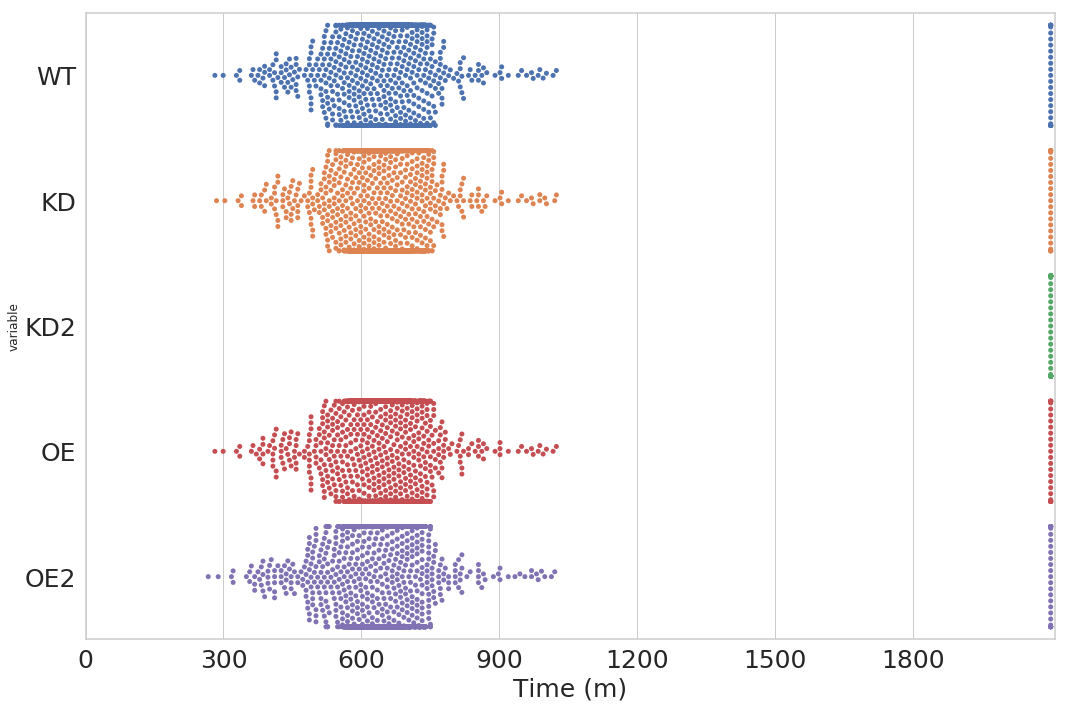

In [195]:
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "KD": "lightcoral", "OE":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfm4fadd, zorder=2)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2110, xmin = 1)
ax.set_xticks([0,300, 600, 900, 1200,1500, 1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

In [90]:
for i,t in enumerate(tspan):
    print(i,":",t)

0 : 0.0
1 : 2.8857715430861726
2 : 5.771543086172345
3 : 8.657314629258519
4 : 11.54308617234469
5 : 14.428857715430862
6 : 17.314629258517037
7 : 20.20040080160321
8 : 23.08617234468938
9 : 25.971943887775552
10 : 28.857715430861724
11 : 31.7434869739479
12 : 34.629258517034074
13 : 37.515030060120246
14 : 40.40080160320642
15 : 43.28657314629259
16 : 46.17234468937876
17 : 49.05811623246493
18 : 51.943887775551104
19 : 54.829659318637276
20 : 57.71543086172345
21 : 60.60120240480963
22 : 63.4869739478958
23 : 66.37274549098197
24 : 69.25851703406815
25 : 72.14428857715431
26 : 75.03006012024049
27 : 77.91583166332666
28 : 80.80160320641284
29 : 83.687374749499
30 : 86.57314629258518
31 : 89.45891783567134
32 : 92.34468937875752
33 : 95.2304609218437
34 : 98.11623246492987
35 : 101.00200400801604
36 : 103.88777555110221
37 : 106.77354709418839
38 : 109.65931863727455
39 : 112.54509018036073
40 : 115.4308617234469
41 : 118.31663326653307
42 : 121.20240480961925
43 : 124.08817635270542


In [109]:
sim_idx_pmlklm1 = [idx for idx in range(len(mode1_100)) if m1alldf100wt ['MLKLa_obs'][idx].iloc[382] > 2772]
print(len(sim_idx_pmlklm1))

3605


In [115]:
np.save('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy', mode1_100[sim_idx_pmlklm1])

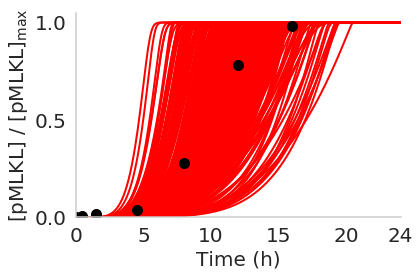

In [173]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt['MLKLa_obs'].iloc[:].max(),
             color = 'red', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('mode1_pmlkl_allpars_redcolor_nogridwdata.pdf')
plt.show() 

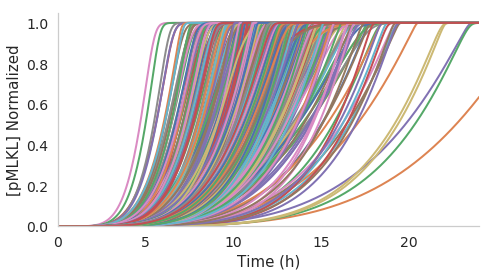

In [85]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt['MLKLa_obs'].iloc[:].max(),lw=2)
plt.xlabel("Time (h)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1_dynamics_pmlkl_test.pdf')
plt.show() 

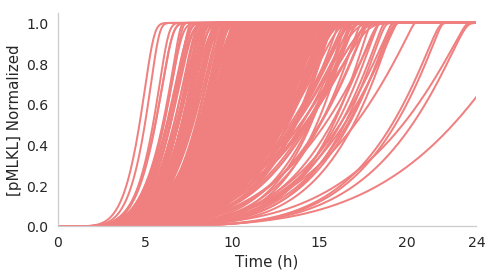

In [81]:
fig, ax = plt.subplots(figsize = (5, 4))
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('nerm_mode1_dynamics_pmlkl_test.pdf')
plt.show() 

In [13]:
solverwtm1e = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1e = solverwtm1e.run(param_values=clus0_100e[13], num_processors = 20)
m1edf100wt = wtm1e.dataframe

2021-12-07 16:22:14.734 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:22:14.747 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:22:14.818 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:22:14.878 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:22:15.130 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:22:15.132 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:22:15.183 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


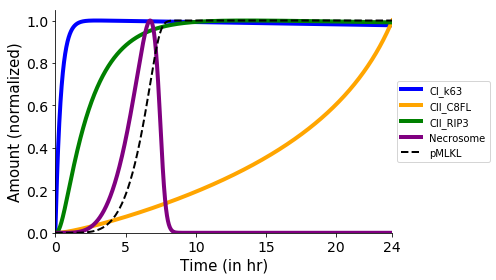

In [55]:
fig, ax = plt.subplots(figsize = (7, 4))
# plt.plot(tspan/60, m1edf100wt['CI_k63_obs'].iloc[:]/m1edf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
# plt.plot(tspan/60, m1edf100wt['CII_C8a_obs'].iloc[:]/m1edf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
# plt.plot(tspan/60, m1edf100wt['CII_RIP3_obs'].iloc[:]/m1edf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
# plt.plot(tspan/60, m1edf100wt['RIP1RIP3unmod_obs'].iloc[:]/m1edf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m1edf100wt['R1pR3p_obs'].iloc[:]/m1edf100wt['R1pR3p_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [30]:
solverm1m = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1m = solverm1m.run(param_values=clus0_100m[2], num_processors = 20)
m1mdf100wt = wtm1m.dataframe

2021-12-07 16:27:30.933 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:27:30.946 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:27:31.016 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:27:31.076 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:27:31.320 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:27:31.322 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:27:31.375 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


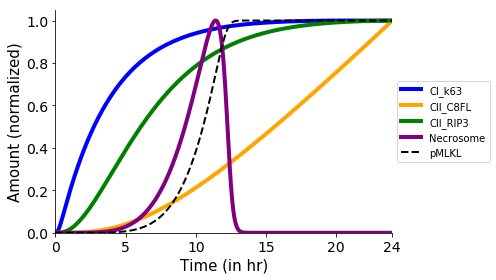

In [56]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m1mdf100wt['CI_k63_obs'].iloc[:]/m1mdf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m1mdf100wt['CII_C8a_obs'].iloc[:]/m1mdf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m1mdf100wt['CII_RIP3_obs'].iloc[:]/m1mdf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m1mdf100wt['RIP1RIP3unmod_obs'].iloc[:]/m1mdf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m1mdf100wt['MLKLa_obs'].iloc[:]/m1mdf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1m_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [43]:
solverm1d = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1d = solverm1d.run(param_values=clus0_100d[10], num_processors = 20)
m1ddf100wt = wtm1d.dataframe

2021-12-07 16:35:33.705 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:35:33.718 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:35:33.791 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:35:33.850 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:35:34.124 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:35:34.126 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:35:34.186 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


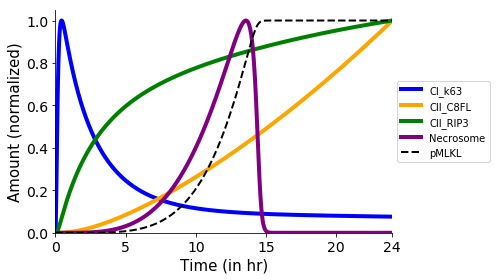

In [57]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m1ddf100wt['CI_k63_obs'].iloc[:]/m1ddf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m1ddf100wt['CII_C8a_obs'].iloc[:]/m1ddf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m1ddf100wt['CII_RIP3_obs'].iloc[:]/m1ddf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m1ddf100wt['RIP1RIP3unmod_obs'].iloc[:]/m1ddf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m1ddf100wt['MLKLa_obs'].iloc[:]/m1ddf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1d_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [62]:
m = model.components
tspan = np.linspace(0,1800,500)

In [156]:
solvera201 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus1 = solvera201.run(initials = {m.A20(brip = None):0},
                         param_values=mode1_100, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c1df100a201 = a20clus1.dataframe

2022-01-07 10:53:37.044 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 10:53:37.049 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 10:53:37.085 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 10:53:37.278 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 10:57:45.223 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 10:57:45.224 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 10:57:47.252 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [157]:
solvercyld0 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclus0 = solvercyld0.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=mode1_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cyld = cyldclus0.dataframe

2022-01-07 10:57:50.411 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 10:57:50.417 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 10:57:50.450 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 10:57:50.644 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 11:02:02.376 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 11:02:02.378 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 11:02:04.460 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [158]:
solvercylda200 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclusa200 = solvercylda200.run(initials = {m.CYLD(brip=None, btraf = None):0,m.A20(brip = None):0},
                         param_values=mode1_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cylda20 = cyldclusa200.dataframe

2022-01-07 11:02:07.467 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 11:02:07.473 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 11:02:07.510 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 11:02:07.693 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 11:06:03.007 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 11:06:03.009 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 11:06:04.960 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [67]:
threshold = 2772

In [159]:
df_threshtimesc2100wt = m1alldf100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c1df100a201.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c0df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cylda20 = c0df100cylda20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [174]:
thresh = 2772
ttdwt = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(m1alldf100wt.loc[j]['MLKLa_obs']))
    for i in i_range:
        if m1alldf100wt.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdwt.append(m1alldf100wt.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdwt.append(np.inf)

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39
this is output line 40
this is output line 41
this is output line 42
this is output line 4

this is output line 349
this is output line 350
this is output line 351
this is output line 352
this is output line 353
this is output line 354
this is output line 355
this is output line 356
this is output line 357
this is output line 358
this is output line 359
this is output line 360
this is output line 361
this is output line 362
this is output line 363
this is output line 364
this is output line 365
this is output line 366
this is output line 367
this is output line 368
this is output line 369
this is output line 370
this is output line 371
this is output line 372
this is output line 373
this is output line 374
this is output line 375
this is output line 376
this is output line 377
this is output line 378
this is output line 379
this is output line 380
this is output line 381
this is output line 382
this is output line 383
this is output line 384
this is output line 385
this is output line 386
this is output line 387
this is output line 388
this is output line 389
this is output l

this is output line 691
this is output line 692
this is output line 693
this is output line 694
this is output line 695
this is output line 696
this is output line 697
this is output line 698
this is output line 699
this is output line 700
this is output line 701
this is output line 702
this is output line 703
this is output line 704
this is output line 705
this is output line 706
this is output line 707
this is output line 708
this is output line 709
this is output line 710
this is output line 711
this is output line 712
this is output line 713
this is output line 714
this is output line 715
this is output line 716
this is output line 717
this is output line 718
this is output line 719
this is output line 720
this is output line 721
this is output line 722
this is output line 723
this is output line 724
this is output line 725
this is output line 726
this is output line 727
this is output line 728
this is output line 729
this is output line 730
this is output line 731
this is output l

this is output line 1035
this is output line 1036
this is output line 1037
this is output line 1038
this is output line 1039
this is output line 1040
this is output line 1041
this is output line 1042
this is output line 1043
this is output line 1044
this is output line 1045
this is output line 1046
this is output line 1047
this is output line 1048
this is output line 1049
this is output line 1050
this is output line 1051
this is output line 1052
this is output line 1053
this is output line 1054
this is output line 1055
this is output line 1056
this is output line 1057
this is output line 1058
this is output line 1059
this is output line 1060
this is output line 1061
this is output line 1062
this is output line 1063
this is output line 1064
this is output line 1065
this is output line 1066
this is output line 1067
this is output line 1068
this is output line 1069
this is output line 1070
this is output line 1071
this is output line 1072
this is output line 1073
this is output line 1074


this is output line 1366
this is output line 1367
this is output line 1368
this is output line 1369
this is output line 1370
this is output line 1371
this is output line 1372
this is output line 1373
this is output line 1374
this is output line 1375
this is output line 1376
this is output line 1377
this is output line 1378
this is output line 1379
this is output line 1380
this is output line 1381
this is output line 1382
this is output line 1383
this is output line 1384
this is output line 1385
this is output line 1386
this is output line 1387
this is output line 1388
this is output line 1389
this is output line 1390
this is output line 1391
this is output line 1392
this is output line 1393
this is output line 1394
this is output line 1395
this is output line 1396
this is output line 1397
this is output line 1398
this is output line 1399
this is output line 1400
this is output line 1401
this is output line 1402
this is output line 1403
this is output line 1404
this is output line 1405


this is output line 1695
this is output line 1696
this is output line 1697
this is output line 1698
this is output line 1699
this is output line 1700
this is output line 1701
this is output line 1702
this is output line 1703
this is output line 1704
this is output line 1705
this is output line 1706
this is output line 1707
this is output line 1708
this is output line 1709
this is output line 1710
this is output line 1711
this is output line 1712
this is output line 1713
this is output line 1714
this is output line 1715
this is output line 1716
this is output line 1717
this is output line 1718
this is output line 1719
this is output line 1720
this is output line 1721
this is output line 1722
this is output line 1723
this is output line 1724
this is output line 1725
this is output line 1726
this is output line 1727
this is output line 1728
this is output line 1729
this is output line 1730
this is output line 1731
this is output line 1732
this is output line 1733
this is output line 1734


this is output line 2025
this is output line 2026
this is output line 2027
this is output line 2028
this is output line 2029
this is output line 2030
this is output line 2031
this is output line 2032
this is output line 2033
this is output line 2034
this is output line 2035
this is output line 2036
this is output line 2037
this is output line 2038
this is output line 2039
this is output line 2040
this is output line 2041
this is output line 2042
this is output line 2043
this is output line 2044
this is output line 2045
this is output line 2046
this is output line 2047
this is output line 2048
this is output line 2049
this is output line 2050
this is output line 2051
this is output line 2052
this is output line 2053
this is output line 2054
this is output line 2055
this is output line 2056
this is output line 2057
this is output line 2058
this is output line 2059
this is output line 2060
this is output line 2061
this is output line 2062
this is output line 2063
this is output line 2064


this is output line 2355
this is output line 2356
this is output line 2357
this is output line 2358
this is output line 2359
this is output line 2360
this is output line 2361
this is output line 2362
this is output line 2363
this is output line 2364
this is output line 2365
this is output line 2366
this is output line 2367
this is output line 2368
this is output line 2369
this is output line 2370
this is output line 2371
this is output line 2372
this is output line 2373
this is output line 2374
this is output line 2375
this is output line 2376
this is output line 2377
this is output line 2378
this is output line 2379
this is output line 2380
this is output line 2381
this is output line 2382
this is output line 2383
this is output line 2384
this is output line 2385
this is output line 2386
this is output line 2387
this is output line 2388
this is output line 2389
this is output line 2390
this is output line 2391
this is output line 2392
this is output line 2393
this is output line 2394


this is output line 2683
this is output line 2684
this is output line 2685
this is output line 2686
this is output line 2687
this is output line 2688
this is output line 2689
this is output line 2690
this is output line 2691
this is output line 2692
this is output line 2693
this is output line 2694
this is output line 2695
this is output line 2696
this is output line 2697
this is output line 2698
this is output line 2699
this is output line 2700
this is output line 2701
this is output line 2702
this is output line 2703
this is output line 2704
this is output line 2705
this is output line 2706
this is output line 2707
this is output line 2708
this is output line 2709
this is output line 2710
this is output line 2711
this is output line 2712
this is output line 2713
this is output line 2714
this is output line 2715
this is output line 2716
this is output line 2717
this is output line 2718
this is output line 2719
this is output line 2720
this is output line 2721
this is output line 2722


this is output line 3011
this is output line 3012
this is output line 3013
this is output line 3014
this is output line 3015
this is output line 3016
this is output line 3017
this is output line 3018
this is output line 3019
this is output line 3020
this is output line 3021
this is output line 3022
this is output line 3023
this is output line 3024
this is output line 3025
this is output line 3026
this is output line 3027
this is output line 3028
this is output line 3029
this is output line 3030
this is output line 3031
this is output line 3032
this is output line 3033
this is output line 3034
this is output line 3035
this is output line 3036
this is output line 3037
this is output line 3038
this is output line 3039
this is output line 3040
this is output line 3041
this is output line 3042
this is output line 3043
this is output line 3044
this is output line 3045
this is output line 3046
this is output line 3047
this is output line 3048
this is output line 3049
this is output line 3050


this is output line 3340
this is output line 3341
this is output line 3342
this is output line 3343
this is output line 3344
this is output line 3345
this is output line 3346
this is output line 3347
this is output line 3348
this is output line 3349
this is output line 3350
this is output line 3351
this is output line 3352
this is output line 3353
this is output line 3354
this is output line 3355
this is output line 3356
this is output line 3357
this is output line 3358
this is output line 3359
this is output line 3360
this is output line 3361
this is output line 3362
this is output line 3363
this is output line 3364
this is output line 3365
this is output line 3366
this is output line 3367
this is output line 3368
this is output line 3369
this is output line 3370
this is output line 3371
this is output line 3372
this is output line 3373
this is output line 3374
this is output line 3375
this is output line 3376
this is output line 3377
this is output line 3378
this is output line 3379


In [177]:
thresh = 2772
ttda20 = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c1df100a201.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c1df100a201.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda20.append(c1df100a201.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda20.append(np.inf)
print()        
print(ttda20)
print(len(ttda20))
# print('TTD = ', m3alldf100wt['time'][idx])  

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39
this is output line 40
this is output line 41
this is output line 42
this is output line 4

this is output line 346
this is output line 347
this is output line 348
this is output line 349
this is output line 350
this is output line 351
this is output line 352
this is output line 353
this is output line 354
this is output line 355
this is output line 356
this is output line 357
this is output line 358
this is output line 359
this is output line 360
this is output line 361
this is output line 362
this is output line 363
this is output line 364
this is output line 365
this is output line 366
this is output line 367
this is output line 368
this is output line 369
this is output line 370
this is output line 371
this is output line 372
this is output line 373
this is output line 374
this is output line 375
this is output line 376
this is output line 377
this is output line 378
this is output line 379
this is output line 380
this is output line 381
this is output line 382
this is output line 383
this is output line 384
this is output line 385
this is output line 386
this is output l

this is output line 689
this is output line 690
this is output line 691
this is output line 692
this is output line 693
this is output line 694
this is output line 695
this is output line 696
this is output line 697
this is output line 698
this is output line 699
this is output line 700
this is output line 701
this is output line 702
this is output line 703
this is output line 704
this is output line 705
this is output line 706
this is output line 707
this is output line 708
this is output line 709
this is output line 710
this is output line 711
this is output line 712
this is output line 713
this is output line 714
this is output line 715
this is output line 716
this is output line 717
this is output line 718
this is output line 719
this is output line 720
this is output line 721
this is output line 722
this is output line 723
this is output line 724
this is output line 725
this is output line 726
this is output line 727
this is output line 728
this is output line 729
this is output l

this is output line 1031
this is output line 1032
this is output line 1033
this is output line 1034
this is output line 1035
this is output line 1036
this is output line 1037
this is output line 1038
this is output line 1039
this is output line 1040
this is output line 1041
this is output line 1042
this is output line 1043
this is output line 1044
this is output line 1045
this is output line 1046
this is output line 1047
this is output line 1048
this is output line 1049
this is output line 1050
this is output line 1051
this is output line 1052
this is output line 1053
this is output line 1054
this is output line 1055
this is output line 1056
this is output line 1057
this is output line 1058
this is output line 1059
this is output line 1060
this is output line 1061
this is output line 1062
this is output line 1063
this is output line 1064
this is output line 1065
this is output line 1066
this is output line 1067
this is output line 1068
this is output line 1069
this is output line 1070


this is output line 1360
this is output line 1361
this is output line 1362
this is output line 1363
this is output line 1364
this is output line 1365
this is output line 1366
this is output line 1367
this is output line 1368
this is output line 1369
this is output line 1370
this is output line 1371
this is output line 1372
this is output line 1373
this is output line 1374
this is output line 1375
this is output line 1376
this is output line 1377
this is output line 1378
this is output line 1379
this is output line 1380
this is output line 1381
this is output line 1382
this is output line 1383
this is output line 1384
this is output line 1385
this is output line 1386
this is output line 1387
this is output line 1388
this is output line 1389
this is output line 1390
this is output line 1391
this is output line 1392
this is output line 1393
this is output line 1394
this is output line 1395
this is output line 1396
this is output line 1397
this is output line 1398
this is output line 1399


this is output line 1689
this is output line 1690
this is output line 1691
this is output line 1692
this is output line 1693
this is output line 1694
this is output line 1695
this is output line 1696
this is output line 1697
this is output line 1698
this is output line 1699
this is output line 1700
this is output line 1701
this is output line 1702
this is output line 1703
this is output line 1704
this is output line 1705
this is output line 1706
this is output line 1707
this is output line 1708
this is output line 1709
this is output line 1710
this is output line 1711
this is output line 1712
this is output line 1713
this is output line 1714
this is output line 1715
this is output line 1716
this is output line 1717
this is output line 1718
this is output line 1719
this is output line 1720
this is output line 1721
this is output line 1722
this is output line 1723
this is output line 1724
this is output line 1725
this is output line 1726
this is output line 1727
this is output line 1728


this is output line 2018
this is output line 2019
this is output line 2020
this is output line 2021
this is output line 2022
this is output line 2023
this is output line 2024
this is output line 2025
this is output line 2026
this is output line 2027
this is output line 2028
this is output line 2029
this is output line 2030
this is output line 2031
this is output line 2032
this is output line 2033
this is output line 2034
this is output line 2035
this is output line 2036
this is output line 2037
this is output line 2038
this is output line 2039
this is output line 2040
this is output line 2041
this is output line 2042
this is output line 2043
this is output line 2044
this is output line 2045
this is output line 2046
this is output line 2047
this is output line 2048
this is output line 2049
this is output line 2050
this is output line 2051
this is output line 2052
this is output line 2053
this is output line 2054
this is output line 2055
this is output line 2056
this is output line 2057


this is output line 2347
this is output line 2348
this is output line 2349
this is output line 2350
this is output line 2351
this is output line 2352
this is output line 2353
this is output line 2354
this is output line 2355
this is output line 2356
this is output line 2357
this is output line 2358
this is output line 2359
this is output line 2360
this is output line 2361
this is output line 2362
this is output line 2363
this is output line 2364
this is output line 2365
this is output line 2366
this is output line 2367
this is output line 2368
this is output line 2369
this is output line 2370
this is output line 2371
this is output line 2372
this is output line 2373
this is output line 2374
this is output line 2375
this is output line 2376
this is output line 2377
this is output line 2378
this is output line 2379
this is output line 2380
this is output line 2381
this is output line 2382
this is output line 2383
this is output line 2384
this is output line 2385
this is output line 2386


this is output line 2675
this is output line 2676
this is output line 2677
this is output line 2678
this is output line 2679
this is output line 2680
this is output line 2681
this is output line 2682
this is output line 2683
this is output line 2684
this is output line 2685
this is output line 2686
this is output line 2687
this is output line 2688
this is output line 2689
this is output line 2690
this is output line 2691
this is output line 2692
this is output line 2693
this is output line 2694
this is output line 2695
this is output line 2696
this is output line 2697
this is output line 2698
this is output line 2699
this is output line 2700
this is output line 2701
this is output line 2702
this is output line 2703
this is output line 2704
this is output line 2705
this is output line 2706
this is output line 2707
this is output line 2708
this is output line 2709
this is output line 2710
this is output line 2711
this is output line 2712
this is output line 2713
this is output line 2714


this is output line 3003
this is output line 3004
this is output line 3005
this is output line 3006
this is output line 3007
this is output line 3008
this is output line 3009
this is output line 3010
this is output line 3011
this is output line 3012
this is output line 3013
this is output line 3014
this is output line 3015
this is output line 3016
this is output line 3017
this is output line 3018
this is output line 3019
this is output line 3020
this is output line 3021
this is output line 3022
this is output line 3023
this is output line 3024
this is output line 3025
this is output line 3026
this is output line 3027
this is output line 3028
this is output line 3029
this is output line 3030
this is output line 3031
this is output line 3032
this is output line 3033
this is output line 3034
this is output line 3035
this is output line 3036
this is output line 3037
this is output line 3038
this is output line 3039
this is output line 3040
this is output line 3041
this is output line 3042


this is output line 3333
this is output line 3334
this is output line 3335
this is output line 3336
this is output line 3337
this is output line 3338
this is output line 3339
this is output line 3340
this is output line 3341
this is output line 3342
this is output line 3343
this is output line 3344
this is output line 3345
this is output line 3346
this is output line 3347
this is output line 3348
this is output line 3349
this is output line 3350
this is output line 3351
this is output line 3352
this is output line 3353
this is output line 3354
this is output line 3355
this is output line 3356
this is output line 3357
this is output line 3358
this is output line 3359
this is output line 3360
this is output line 3361
this is output line 3362
this is output line 3363
this is output line 3364
this is output line 3365
this is output line 3366
this is output line 3367
this is output line 3368
this is output line 3369
this is output line 3370
this is output line 3371
this is output line 3372


In [178]:
thresh = 2772
ttdcyld = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c0df100cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c0df100cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcyld.append(c0df100cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcyld.append(np.inf)
print()        
print(ttdcyld)
print(len(ttdcyld))
# print('TTD = ', m3alldf100wt['time'][idx])  

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39
this is output line 40
this is output line 41
this is output line 42
this is output line 4

this is output line 349
this is output line 350
this is output line 351
this is output line 352
this is output line 353
this is output line 354
this is output line 355
this is output line 356
this is output line 357
this is output line 358
this is output line 359
this is output line 360
this is output line 361
this is output line 362
this is output line 363
this is output line 364
this is output line 365
this is output line 366
this is output line 367
this is output line 368
this is output line 369
this is output line 370
this is output line 371
this is output line 372
this is output line 373
this is output line 374
this is output line 375
this is output line 376
this is output line 377
this is output line 378
this is output line 379
this is output line 380
this is output line 381
this is output line 382
this is output line 383
this is output line 384
this is output line 385
this is output line 386
this is output line 387
this is output line 388
this is output line 389
this is output l

this is output line 694
this is output line 695
this is output line 696
this is output line 697
this is output line 698
this is output line 699
this is output line 700
this is output line 701
this is output line 702
this is output line 703
this is output line 704
this is output line 705
this is output line 706
this is output line 707
this is output line 708
this is output line 709
this is output line 710
this is output line 711
this is output line 712
this is output line 713
this is output line 714
this is output line 715
this is output line 716
this is output line 717
this is output line 718
this is output line 719
this is output line 720
this is output line 721
this is output line 722
this is output line 723
this is output line 724
this is output line 725
this is output line 726
this is output line 727
this is output line 728
this is output line 729
this is output line 730
this is output line 731
this is output line 732
this is output line 733
this is output line 734
this is output l

this is output line 1037
this is output line 1038
this is output line 1039
this is output line 1040
this is output line 1041
this is output line 1042
this is output line 1043
this is output line 1044
this is output line 1045
this is output line 1046
this is output line 1047
this is output line 1048
this is output line 1049
this is output line 1050
this is output line 1051
this is output line 1052
this is output line 1053
this is output line 1054
this is output line 1055
this is output line 1056
this is output line 1057
this is output line 1058
this is output line 1059
this is output line 1060
this is output line 1061
this is output line 1062
this is output line 1063
this is output line 1064
this is output line 1065
this is output line 1066
this is output line 1067
this is output line 1068
this is output line 1069
this is output line 1070
this is output line 1071
this is output line 1072
this is output line 1073
this is output line 1074
this is output line 1075
this is output line 1076


this is output line 1368
this is output line 1369
this is output line 1370
this is output line 1371
this is output line 1372
this is output line 1373
this is output line 1374
this is output line 1375
this is output line 1376
this is output line 1377
this is output line 1378
this is output line 1379
this is output line 1380
this is output line 1381
this is output line 1382
this is output line 1383
this is output line 1384
this is output line 1385
this is output line 1386
this is output line 1387
this is output line 1388
this is output line 1389
this is output line 1390
this is output line 1391
this is output line 1392
this is output line 1393
this is output line 1394
this is output line 1395
this is output line 1396
this is output line 1397
this is output line 1398
this is output line 1399
this is output line 1400
this is output line 1401
this is output line 1402
this is output line 1403
this is output line 1404
this is output line 1405
this is output line 1406
this is output line 1407


this is output line 1698
this is output line 1699
this is output line 1700
this is output line 1701
this is output line 1702
this is output line 1703
this is output line 1704
this is output line 1705
this is output line 1706
this is output line 1707
this is output line 1708
this is output line 1709
this is output line 1710
this is output line 1711
this is output line 1712
this is output line 1713
this is output line 1714
this is output line 1715
this is output line 1716
this is output line 1717
this is output line 1718
this is output line 1719
this is output line 1720
this is output line 1721
this is output line 1722
this is output line 1723
this is output line 1724
this is output line 1725
this is output line 1726
this is output line 1727
this is output line 1728
this is output line 1729
this is output line 1730
this is output line 1731
this is output line 1732
this is output line 1733
this is output line 1734
this is output line 1735
this is output line 1736
this is output line 1737


this is output line 2027
this is output line 2028
this is output line 2029
this is output line 2030
this is output line 2031
this is output line 2032
this is output line 2033
this is output line 2034
this is output line 2035
this is output line 2036
this is output line 2037
this is output line 2038
this is output line 2039
this is output line 2040
this is output line 2041
this is output line 2042
this is output line 2043
this is output line 2044
this is output line 2045
this is output line 2046
this is output line 2047
this is output line 2048
this is output line 2049
this is output line 2050
this is output line 2051
this is output line 2052
this is output line 2053
this is output line 2054
this is output line 2055
this is output line 2056
this is output line 2057
this is output line 2058
this is output line 2059
this is output line 2060
this is output line 2061
this is output line 2062
this is output line 2063
this is output line 2064
this is output line 2065
this is output line 2066


this is output line 2356
this is output line 2357
this is output line 2358
this is output line 2359
this is output line 2360
this is output line 2361
this is output line 2362
this is output line 2363
this is output line 2364
this is output line 2365
this is output line 2366
this is output line 2367
this is output line 2368
this is output line 2369
this is output line 2370
this is output line 2371
this is output line 2372
this is output line 2373
this is output line 2374
this is output line 2375
this is output line 2376
this is output line 2377
this is output line 2378
this is output line 2379
this is output line 2380
this is output line 2381
this is output line 2382
this is output line 2383
this is output line 2384
this is output line 2385
this is output line 2386
this is output line 2387
this is output line 2388
this is output line 2389
this is output line 2390
this is output line 2391
this is output line 2392
this is output line 2393
this is output line 2394
this is output line 2395


this is output line 2686
this is output line 2687
this is output line 2688
this is output line 2689
this is output line 2690
this is output line 2691
this is output line 2692
this is output line 2693
this is output line 2694
this is output line 2695
this is output line 2696
this is output line 2697
this is output line 2698
this is output line 2699
this is output line 2700
this is output line 2701
this is output line 2702
this is output line 2703
this is output line 2704
this is output line 2705
this is output line 2706
this is output line 2707
this is output line 2708
this is output line 2709
this is output line 2710
this is output line 2711
this is output line 2712
this is output line 2713
this is output line 2714
this is output line 2715
this is output line 2716
this is output line 2717
this is output line 2718
this is output line 2719
this is output line 2720
this is output line 2721
this is output line 2722
this is output line 2723
this is output line 2724
this is output line 2725


this is output line 3016
this is output line 3017
this is output line 3018
this is output line 3019
this is output line 3020
this is output line 3021
this is output line 3022
this is output line 3023
this is output line 3024
this is output line 3025
this is output line 3026
this is output line 3027
this is output line 3028
this is output line 3029
this is output line 3030
this is output line 3031
this is output line 3032
this is output line 3033
this is output line 3034
this is output line 3035
this is output line 3036
this is output line 3037
this is output line 3038
this is output line 3039
this is output line 3040
this is output line 3041
this is output line 3042
this is output line 3043
this is output line 3044
this is output line 3045
this is output line 3046
this is output line 3047
this is output line 3048
this is output line 3049
this is output line 3050
this is output line 3051
this is output line 3052
this is output line 3053
this is output line 3054
this is output line 3055


this is output line 3346
this is output line 3347
this is output line 3348
this is output line 3349
this is output line 3350
this is output line 3351
this is output line 3352
this is output line 3353
this is output line 3354
this is output line 3355
this is output line 3356
this is output line 3357
this is output line 3358
this is output line 3359
this is output line 3360
this is output line 3361
this is output line 3362
this is output line 3363
this is output line 3364
this is output line 3365
this is output line 3366
this is output line 3367
this is output line 3368
this is output line 3369
this is output line 3370
this is output line 3371
this is output line 3372
this is output line 3373
this is output line 3374
this is output line 3375
this is output line 3376
this is output line 3377
this is output line 3378
this is output line 3379
this is output line 3380
this is output line 3381
this is output line 3382
this is output line 3383
this is output line 3384
this is output line 3385


In [179]:
thresh = 2772
ttdcylda20 = []
for j in range(len(mode1_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c0df100cylda20.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c0df100cylda20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcylda20.append(c0df100cylda20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcylda20.append(np.inf)
print()        
print(ttdcylda20)
print(len(ttdcylda20))
# print('TTD = ', m3alldf100wt['time'][idx])  

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39
this is output line 40
this is output line 41
this is output line 42
this is output line 4

this is output line 346
this is output line 347
this is output line 348
this is output line 349
this is output line 350
this is output line 351
this is output line 352
this is output line 353
this is output line 354
this is output line 355
this is output line 356
this is output line 357
this is output line 358
this is output line 359
this is output line 360
this is output line 361
this is output line 362
this is output line 363
this is output line 364
this is output line 365
this is output line 366
this is output line 367
this is output line 368
this is output line 369
this is output line 370
this is output line 371
this is output line 372
this is output line 373
this is output line 374
this is output line 375
this is output line 376
this is output line 377
this is output line 378
this is output line 379
this is output line 380
this is output line 381
this is output line 382
this is output line 383
this is output line 384
this is output line 385
this is output line 386
this is output l

this is output line 689
this is output line 690
this is output line 691
this is output line 692
this is output line 693
this is output line 694
this is output line 695
this is output line 696
this is output line 697
this is output line 698
this is output line 699
this is output line 700
this is output line 701
this is output line 702
this is output line 703
this is output line 704
this is output line 705
this is output line 706
this is output line 707
this is output line 708
this is output line 709
this is output line 710
this is output line 711
this is output line 712
this is output line 713
this is output line 714
this is output line 715
this is output line 716
this is output line 717
this is output line 718
this is output line 719
this is output line 720
this is output line 721
this is output line 722
this is output line 723
this is output line 724
this is output line 725
this is output line 726
this is output line 727
this is output line 728
this is output line 729
this is output l

this is output line 1031
this is output line 1032
this is output line 1033
this is output line 1034
this is output line 1035
this is output line 1036
this is output line 1037
this is output line 1038
this is output line 1039
this is output line 1040
this is output line 1041
this is output line 1042
this is output line 1043
this is output line 1044
this is output line 1045
this is output line 1046
this is output line 1047
this is output line 1048
this is output line 1049
this is output line 1050
this is output line 1051
this is output line 1052
this is output line 1053
this is output line 1054
this is output line 1055
this is output line 1056
this is output line 1057
this is output line 1058
this is output line 1059
this is output line 1060
this is output line 1061
this is output line 1062
this is output line 1063
this is output line 1064
this is output line 1065
this is output line 1066
this is output line 1067
this is output line 1068
this is output line 1069
this is output line 1070


this is output line 1359
this is output line 1360
this is output line 1361
this is output line 1362
this is output line 1363
this is output line 1364
this is output line 1365
this is output line 1366
this is output line 1367
this is output line 1368
this is output line 1369
this is output line 1370
this is output line 1371
this is output line 1372
this is output line 1373
this is output line 1374
this is output line 1375
this is output line 1376
this is output line 1377
this is output line 1378
this is output line 1379
this is output line 1380
this is output line 1381
this is output line 1382
this is output line 1383
this is output line 1384
this is output line 1385
this is output line 1386
this is output line 1387
this is output line 1388
this is output line 1389
this is output line 1390
this is output line 1391
this is output line 1392
this is output line 1393
this is output line 1394
this is output line 1395
this is output line 1396
this is output line 1397
this is output line 1398


this is output line 1688
this is output line 1689
this is output line 1690
this is output line 1691
this is output line 1692
this is output line 1693
this is output line 1694
this is output line 1695
this is output line 1696
this is output line 1697
this is output line 1698
this is output line 1699
this is output line 1700
this is output line 1701
this is output line 1702
this is output line 1703
this is output line 1704
this is output line 1705
this is output line 1706
this is output line 1707
this is output line 1708
this is output line 1709
this is output line 1710
this is output line 1711
this is output line 1712
this is output line 1713
this is output line 1714
this is output line 1715
this is output line 1716
this is output line 1717
this is output line 1718
this is output line 1719
this is output line 1720
this is output line 1721
this is output line 1722
this is output line 1723
this is output line 1724
this is output line 1725
this is output line 1726
this is output line 1727


this is output line 2018
this is output line 2019
this is output line 2020
this is output line 2021
this is output line 2022
this is output line 2023
this is output line 2024
this is output line 2025
this is output line 2026
this is output line 2027
this is output line 2028
this is output line 2029
this is output line 2030
this is output line 2031
this is output line 2032
this is output line 2033
this is output line 2034
this is output line 2035
this is output line 2036
this is output line 2037
this is output line 2038
this is output line 2039
this is output line 2040
this is output line 2041
this is output line 2042
this is output line 2043
this is output line 2044
this is output line 2045
this is output line 2046
this is output line 2047
this is output line 2048
this is output line 2049
this is output line 2050
this is output line 2051
this is output line 2052
this is output line 2053
this is output line 2054
this is output line 2055
this is output line 2056
this is output line 2057


this is output line 2346
this is output line 2347
this is output line 2348
this is output line 2349
this is output line 2350
this is output line 2351
this is output line 2352
this is output line 2353
this is output line 2354
this is output line 2355
this is output line 2356
this is output line 2357
this is output line 2358
this is output line 2359
this is output line 2360
this is output line 2361
this is output line 2362
this is output line 2363
this is output line 2364
this is output line 2365
this is output line 2366
this is output line 2367
this is output line 2368
this is output line 2369
this is output line 2370
this is output line 2371
this is output line 2372
this is output line 2373
this is output line 2374
this is output line 2375
this is output line 2376
this is output line 2377
this is output line 2378
this is output line 2379
this is output line 2380
this is output line 2381
this is output line 2382
this is output line 2383
this is output line 2384
this is output line 2385


this is output line 2675
this is output line 2676
this is output line 2677
this is output line 2678
this is output line 2679
this is output line 2680
this is output line 2681
this is output line 2682
this is output line 2683
this is output line 2684
this is output line 2685
this is output line 2686
this is output line 2687
this is output line 2688
this is output line 2689
this is output line 2690
this is output line 2691
this is output line 2692
this is output line 2693
this is output line 2694
this is output line 2695
this is output line 2696
this is output line 2697
this is output line 2698
this is output line 2699
this is output line 2700
this is output line 2701
this is output line 2702
this is output line 2703
this is output line 2704
this is output line 2705
this is output line 2706
this is output line 2707
this is output line 2708
this is output line 2709
this is output line 2710
this is output line 2711
this is output line 2712
this is output line 2713
this is output line 2714


this is output line 3004
this is output line 3005
this is output line 3006
this is output line 3007
this is output line 3008
this is output line 3009
this is output line 3010
this is output line 3011
this is output line 3012
this is output line 3013
this is output line 3014
this is output line 3015
this is output line 3016
this is output line 3017
this is output line 3018
this is output line 3019
this is output line 3020
this is output line 3021
this is output line 3022
this is output line 3023
this is output line 3024
this is output line 3025
this is output line 3026
this is output line 3027
this is output line 3028
this is output line 3029
this is output line 3030
this is output line 3031
this is output line 3032
this is output line 3033
this is output line 3034
this is output line 3035
this is output line 3036
this is output line 3037
this is output line 3038
this is output line 3039
this is output line 3040
this is output line 3041
this is output line 3042
this is output line 3043


this is output line 3333
this is output line 3334
this is output line 3335
this is output line 3336
this is output line 3337
this is output line 3338
this is output line 3339
this is output line 3340
this is output line 3341
this is output line 3342
this is output line 3343
this is output line 3344
this is output line 3345
this is output line 3346
this is output line 3347
this is output line 3348
this is output line 3349
this is output line 3350
this is output line 3351
this is output line 3352
this is output line 3353
this is output line 3354
this is output line 3355
this is output line 3356
this is output line 3357
this is output line 3358
this is output line 3359
this is output line 3360
this is output line 3361
this is output line 3362
this is output line 3363
this is output line 3364
this is output line 3365
this is output line 3366
this is output line 3367
this is output line 3368
this is output line 3369
this is output line 3370
this is output line 3371
this is output line 3372


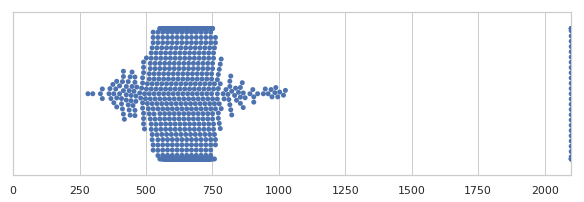

In [176]:
for i in range(len(ttdwt)):
    if ttdwt[i] == np.inf:
        ttdwt[i] = 2100
plt.figure(figsize = (10,3))
sns.swarmplot(ttdwt)
plt.xlim(xmin = 0, xmax  = 2100)
plt.show()

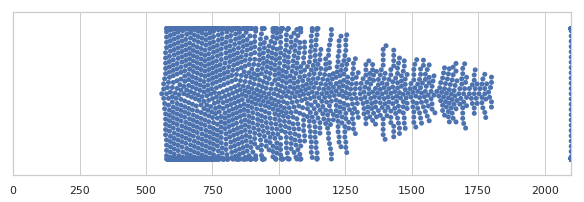

In [202]:
for i in range(len(ttda20)):
    if ttda20[i] == np.inf:
        ttda20[i] = 2100
plt.figure(figsize = (10,3))
sns.swarmplot(ttda20)
plt.xlim(xmin = 0, xmax  = 2100)
plt.show()

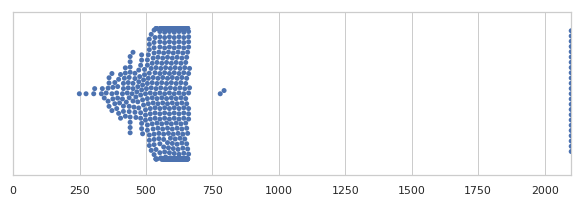

In [205]:
for i in range(len(ttdcyld)):
    if ttdcyld[i] == np.inf:
        ttdcyld[i] = 2100
plt.figure(figsize = (10,3))
sns.swarmplot(ttdcyld)
plt.xlim(xmin = 0, xmax  = 2100)
plt.show()

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [ ]:
for i in range(len(ttdcylda20)):
    if ttdcylda20[i] == np.inf:
        ttdcylda20[i] = 2100
plt.figure(figsize = (10,3))
sns.swarmplot(ttdcylda20)
plt.xlim(xmin = 0, xmax  = 2100)
plt.show()

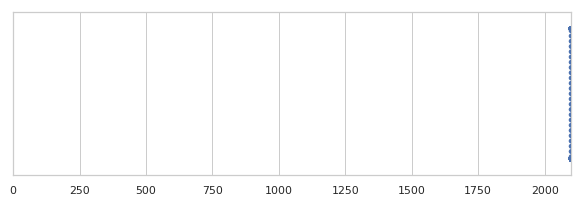

In [214]:
for i in range(len(ttdcylda20)):
    if ttdcylda20[i] == np.inf:
        ttdcylda20[i] = 2100
plt.figure(figsize = (10,3))
sns.swarmplot(ttdcylda20)
plt.xlim(xmin = 0, xmax  = 2100)
plt.show()

In [215]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df1 = pd.DataFrame({'WT': ttdwt, 
                          'CYLD KO': ttdcyld,
                          'A20 KO': ttda20,
                       'CYLD;A20 DKO': ttdcylda20})
dfclus0n1 = pd.DataFrame(data = mode1df1, columns = ['WT', 'CYLD KO','A20 KO', 'CYLD;A20 DKO'])
dfclus1n1 = pd.melt(dfclus0n1)

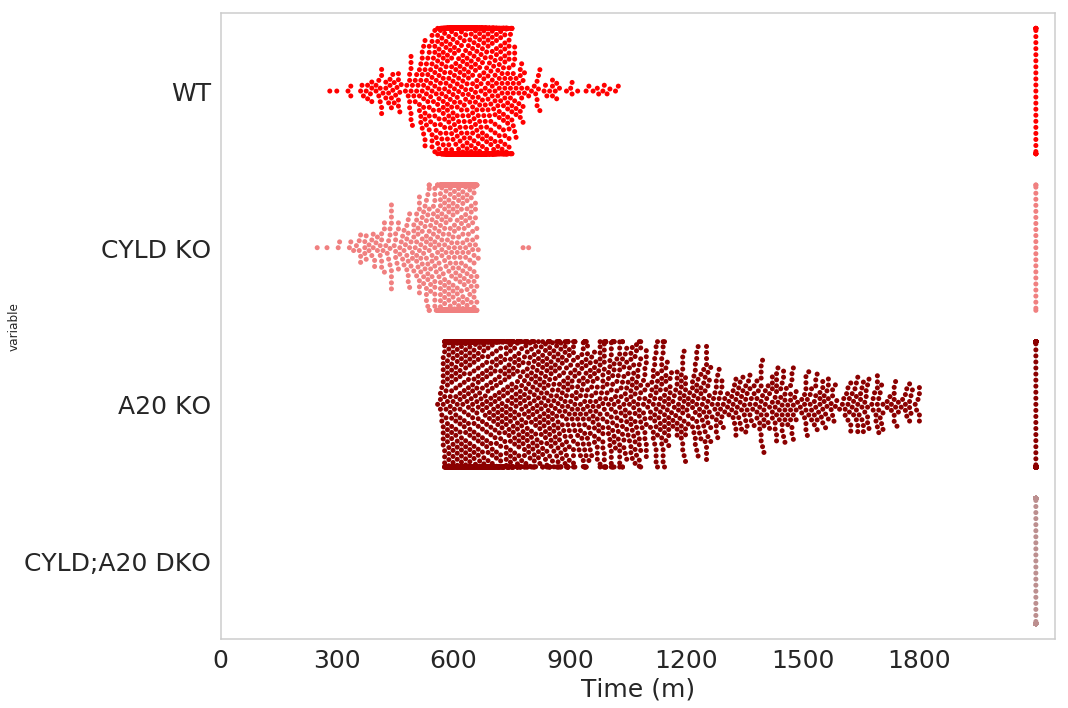

In [218]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "CYLD KO": "lightcoral", "A20 KO":"darkred", 'CYLD;A20 DKO': 'rosybrown'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n1, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors_ttdupdated.pdf')
plt.show()

In [207]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttdwt, 
                          'CYLD KO': ttdcyld,
                          'A20 KO': ttda20,
                       'CYLDA20 DKO': ttdcylda20})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'CYLD KO','A20 KO', 'CYLD;A20 DKO'])
dfclus1n = pd.melt(dfclus0n)

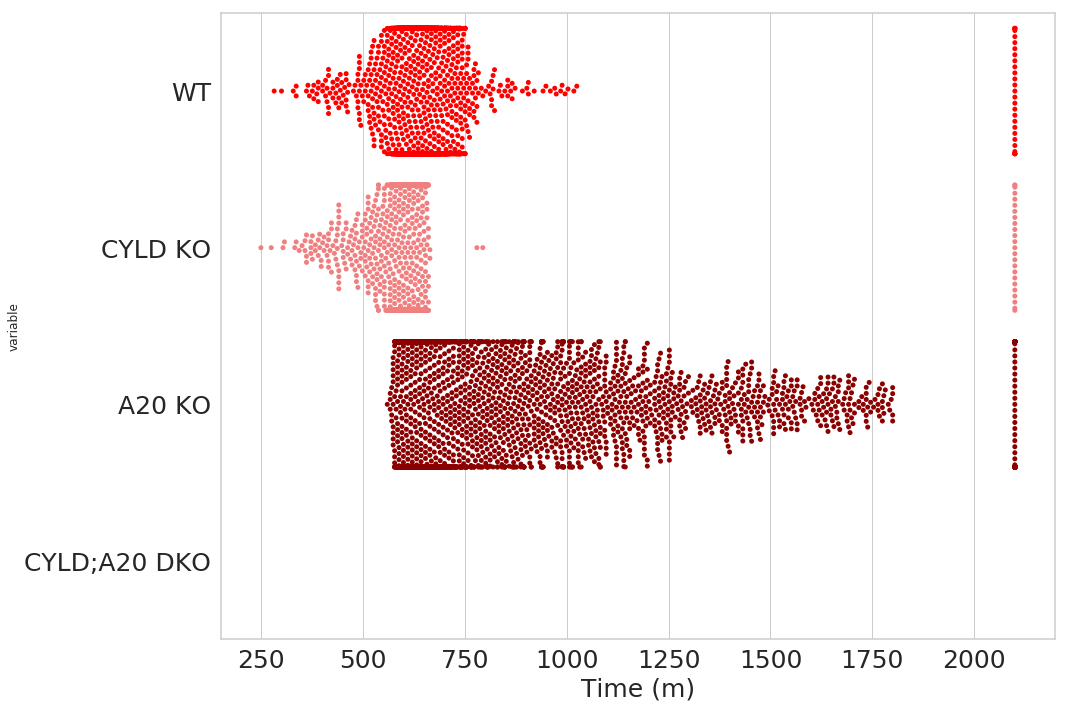

In [211]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "CYLD KO": "lightcoral", "A20 KO":"darkred", 'CYLD;A20 DKO': 'rosybrown'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = )
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

In [163]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs'],
                       'CYLDKOA20KO': df_threshtimesc2100cylda20['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'CYLDKO','A20KO', 'CYLD;A20DKO'])
dfclus0n = pd.melt(dfclus0n)

In [169]:
dfclus0n.head()

,variable,value
0,WT,620.440882
1,WT,710.621242
2,WT,717.835671
3,WT,598.797595
4,WT,631.262525


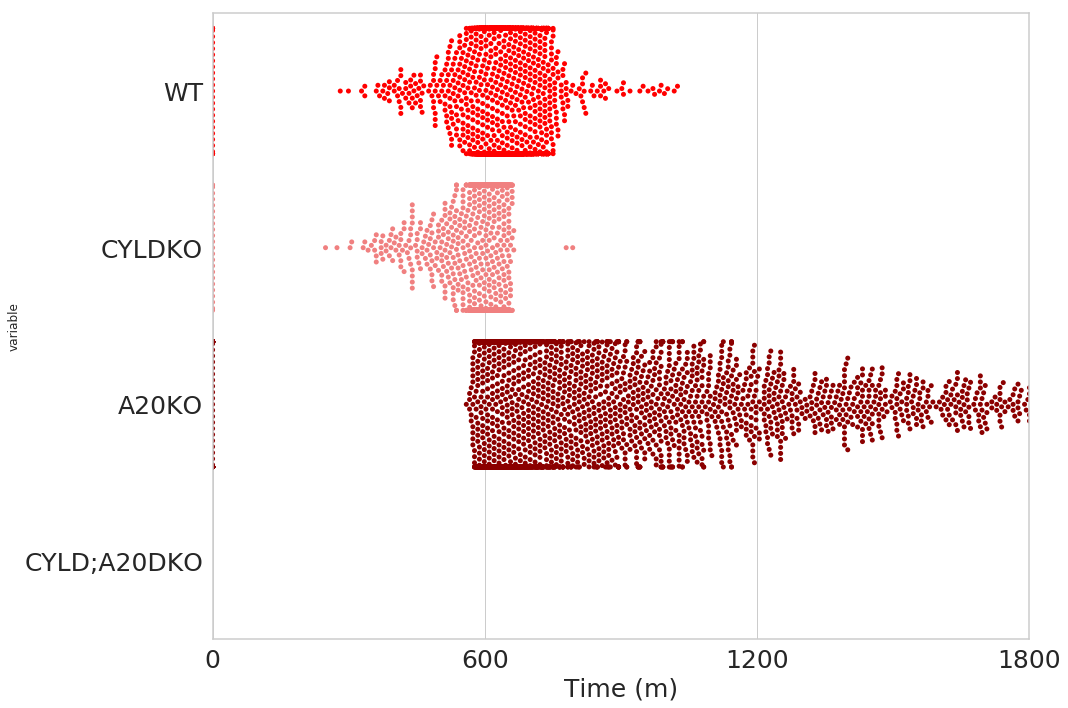

In [168]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "CYLDKO": "lightcoral", "A20KO":"darkred", 'CYLD;A20DKO': 'rosybrown'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 1)
ax.set_xticks([0, 600, 1200, 1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

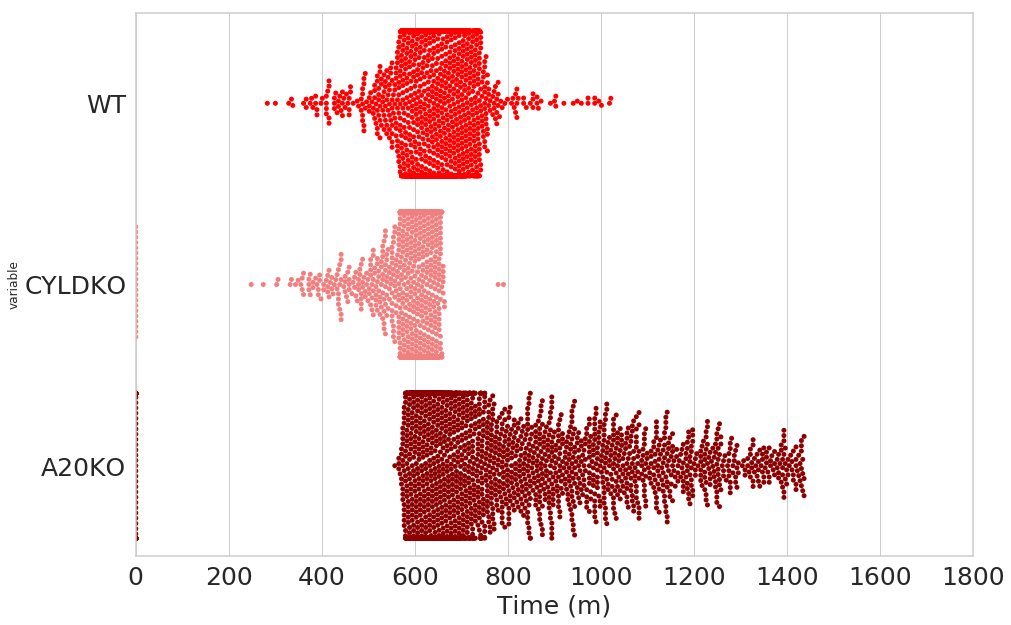

In [141]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "CYLDKO": "lightcoral", "A20KO":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

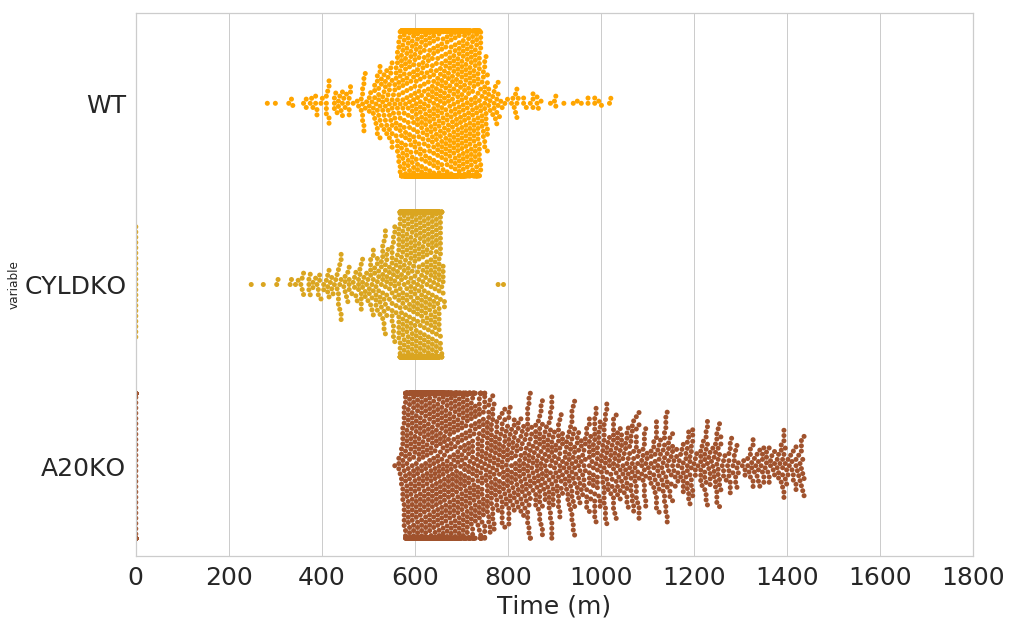

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "orange", "CYLDKO": "goldenrod", "A20KO":"sienna"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()